# Анализ игровой индустрии

## Описание проекта

Данный проект подрузамевает под собой анализ игровой индустрии с выявлением закономерностей, а так же проверкой гипотез, которые помогут выгоднее продовать продукты интернет-магазина "Стримчик".

## Цель проекта

Выявить потенциально популярные продукты и подготовить исследования для будущих рекламных компаний.

## Описание данных

Нам предоставлен набор данных с данными столбцами:

Name — название игры

Platform — платформа

Year_of_Release — год выпуска

Genre — жанр игры

NA_sales — продажи в Северной Америке (миллионы проданных копий)

EU_sales — продажи в Европе (миллионы проданных копий)

JP_sales — продажи в Японии (миллионы проданных копий)

Other_sales — продажи в других странах (миллионы проданных копий)

Critic_Score — оценка критиков (максимум 100)

User_Score — оценка пользователей (максимум 10)

Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## План работы

1. Загрузить данные и изучить информацию о них. Так же изучить данные на предмет аномалий.
2. Предобработка данных. Уничтожение всех аномалий. Добавление новых столбцов для будущих исследований.
3. Исследование данных и выявление закономерностей.
4. Анализ каждого региона по определённым метрикам.
5. Проверка гипотез для будущей деятельности компании.
6. Общий вывод.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
pd.options.mode.chained_assignment = None

## Подготовка данных

In [2]:
#анализируем набор данных
filepath = r"C:\Users\erofe\Downloads\games.csv"
data = pd.read_csv(filepath, sep=',')
#выводим первые 10 строк таблицы
display (data.head(10))
#выводим информацию о таблице
print(data.info())

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None


In [3]:
#проверяем пропуски в столбце с названиями игр
data[data['Name'].isna()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [4]:
#проверяем пропуски в столбце с датой релиза
data[data['Year_of_Release'].isna()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [5]:
#проверяем пропуски в столбце с оценкой от критиков
data[data['Critic_Score'].isna()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [6]:
#проверяем строки на дубликаты
print (data.duplicated().sum())

0


Вывод:

Обнаружены 2 пропуска в столбце с названием игры и жанром, похоже это одна и та же игра, просто в 1 строке находятся продажи в Американском и Европейском регионах, а в другой в японском.

Обнаружены пропуски в столбце с датой релиза - будет исправлено.

Пропуски в столбцах с оценками это нормально, значит оценка просто не сформировалась.

Значение tbd в пользовательских оценках - это значит оценка на момент выгрузки данных еще формируется, поэтому и столбец количественного типа.

Столбец с датой выхода неправильного формата - будет исправлено.

Пропуски в рейтинге, что тоже будет исправлено.

Выбросы нас тут не интересуют, так как при их удалении будет потерян важный пласт данных.

## Предобработка данных

In [7]:
#приводим столбцы к нижнему регистру
data.columns = data.columns.str.lower()

In [8]:
#удаляем пропущенные значения в столбце с названием игр
data.drop([659, 14244],inplace=True)
print (data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB
None


Данные без названия игр и жанра нас не интересуют

In [9]:
data.drop(data[data['year_of_release'].isna()].index,inplace=True)
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB
None


Данные без даты выхода тоже не так интересны для анализа.

In [10]:
#приводим формат даты к правильному
data['year_of_release'] = pd.to_datetime(data['year_of_release'], format = '%Y')
data['year_of_release'] = data['year_of_release'].dt.year
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(5), int32(1), object(5)
memory usage: 1.4+ MB
None


In [11]:
#ищем самые популярные возрастные рейтинги по жанрам
genre_list = data['genre'].unique()
genre_dict = {}
for genre in genre_list:
    rating_value_counts = data[data['genre'] == genre]['rating'].value_counts()
    genre_dict[genre] = rating_value_counts.index[0]
    
genre_dict

{'Sports': 'E',
 'Platform': 'E',
 'Racing': 'E',
 'Role-Playing': 'T',
 'Puzzle': 'E',
 'Misc': 'E',
 'Shooter': 'M',
 'Simulation': 'E',
 'Action': 'T',
 'Fighting': 'T',
 'Adventure': 'E',
 'Strategy': 'T'}

In [12]:
#заполняем пропуски в столбце с возрастным рейтингом
data['rating'] = data['rating'].fillna('NR')

def fill_rating(row):
    if row.iloc[10] == 'NR':
        row.iloc[10] = genre_dict[row.iloc[3]]
    return row

data = data.apply(fill_rating, axis=1)
data.info()

C:\Users\erofe\AppData\Local\Temp\ipykernel_11432\3042246014.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if row[10] == 'NR':
C:\Users\erofe\AppData\Local\Temp\ipykernel_11432\3042246014.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  row[10] = genre_dict[row[3]]
C:\Users\erofe\AppData\Local\Temp\ipykernel_11432\3042246014.py:6: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  row[10] = genre_dict[row[3]]


<class 'pandas.core.frame.DataFrame'>
Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           16444 non-null  object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


In [13]:
#сбрасывем индексы для удобства будущей работы
data = data.reset_index(drop=True)
print (data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           16444 non-null  object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.4+ MB
None


In [14]:
#Заменяем значения tbd на пропущенные значения и меняем формат столбца для будущего удобства в работе на числовой
data['user_score'] = data['user_score'].replace('tbd', np.nan)
data['user_score'] = data['user_score'].astype('float')

К сожалению, пропущенные значения тут никак не заменить(в столбцах с оценками), так как данные никак не вычислить.

In [15]:
#делаем новый столбец с общими продажами
data['world_sales'] = (data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales'])
print (data.head())

                       name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii             2006        Sports     41.36   
1         Super Mario Bros.      NES             1985      Platform     29.08   
2            Mario Kart Wii      Wii             2008        Racing     15.68   
3         Wii Sports Resort      Wii             2009        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB             1996  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score  user_score rating  \
0     28.96      3.77         8.45          76.0         8.0      E   
1      3.58      6.81         0.77           NaN         NaN      E   
2     12.76      3.79         3.29          82.0         8.3      E   
3     10.93      3.28         2.95          80.0         8.0      E   
4      8.89     10.22         1.00           NaN         NaN      T   

   world_sales  
0        82.54  
1        40.24  
2        35.52  
3        32.77  
4

In [16]:
#ищем дубликаты строк, сразу с несколькими схожими столбцами
display (data[data.duplicated(subset = ['name', 'platform', 'year_of_release'])])
#удаляем полный дубликат
data.drop([15969],inplace=True)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,world_sales
15969,Madden NFL 13,PS3,2012,Sports,0.0,0.01,0.0,0.0,83.0,5.5,E,0.01


В данном случае, дубликаты это игры, выпущенные в 1 год на 1 платформе и с 1 названием, тогда это полный дубликат и его стоит очистить.

Вывод:

Данные теперь готовы для анализа после проведенных операций: Столбцы были переименованы, и все названия столбцов приведены к нижнему регистру.

Пропущенные значения в строках были восстановлены или заполнены.

Удалены строки, которые не содержали необходимых данных.

Также был добавлен новый столбец, отражающий суммарные продажи.

Если мы берём столбец с оценками, то там пропуски могли возникнуть из-за непопулярности проектов(поэтому оценки просто не выставлялись). В других столбцах, пропуски явно связаны с человеческим фактором.

## Исследовательский анализ данных

                 games_per_year
year_of_release                
1980                          9
1981                         46
1982                         36
1983                         17
1984                         14


<Axes: title={'center': 'Количество игр выпущенных за год'}, xlabel='Год', ylabel='Количество игр'>

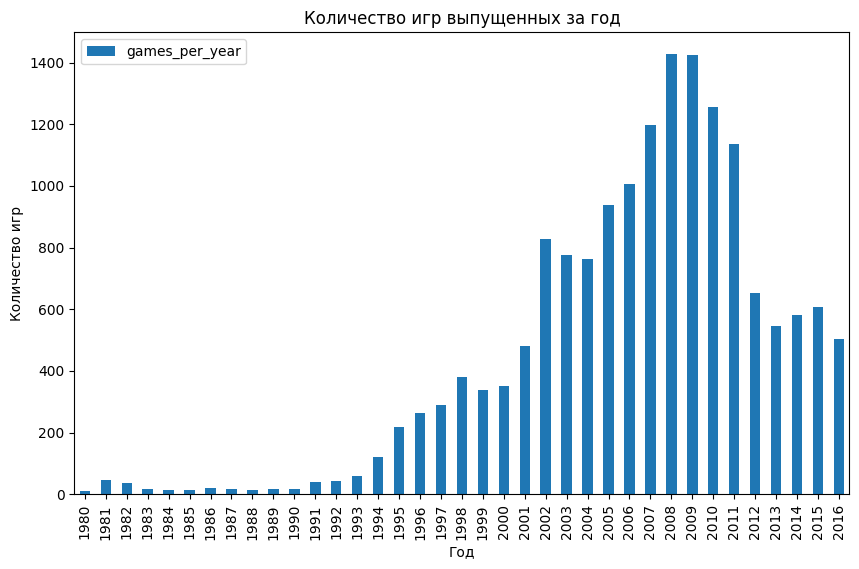

In [17]:
#Строим таблицу и диаграмму с количеством выпущенных игр за год
year_pivot = data.pivot_table(index='year_of_release', values='name', aggfunc='count')
year_pivot.columns = ['games_per_year']
print (year_pivot.head())
year_pivot.plot(kind='bar', figsize = (10,6), title = 'Количество игр выпущенных за год', xlabel = 'Год', ylabel = 'Количество игр')

Данные по всем периодам не важны.

С 1980 по 1993 год в индустрии видеоигр было мало компаний, ограниченное число игроков и недостаточно высококачественных оценок критиков. Рост в этой сфере начался после появления персональных компьютеров и развития программных языков.

В 2002 году наблюдается всплеск выпуска игр, что связано с развитием игровых движков и новых инструментов программирования с 1997 по 2002 год.

Пиковая активность в 2009 году обусловлена не только популярностью создания компьютерных игр, но и доступностью игровых движков, включая бесплатные.

с 2012 начал происходить спад, так как компании поняли, что больше денег приносит не выпуск большого количества игр, а создание онлайн-игры с долгосрочной поддержкой, поэтому и количество выпускаемых игр снизилось.

In [18]:
#Создаем таблицу с самыми популярными продажами по платформам
platform_pivot = data.pivot_table(index='platform', values='world_sales', aggfunc='sum')
platform_pivot = platform_pivot.sort_values('world_sales',ascending=False)
platform_pivot

,world_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.33
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


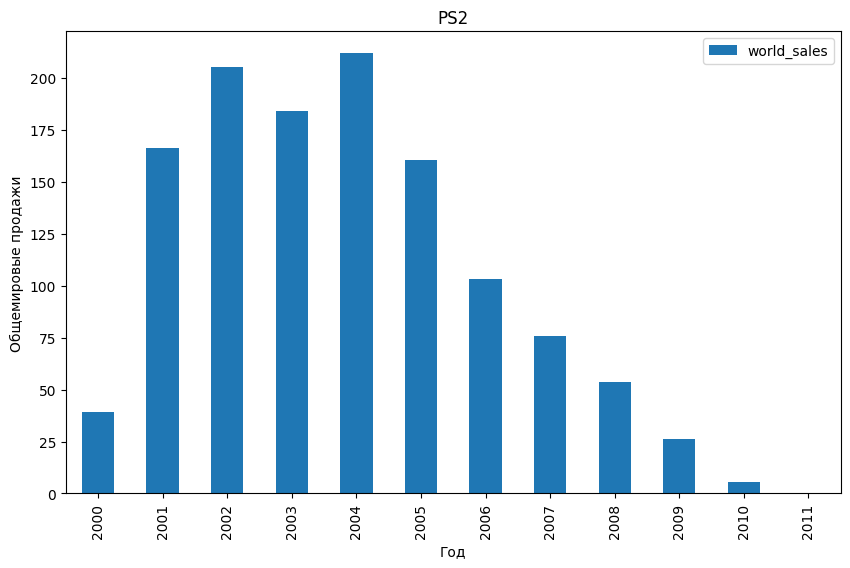

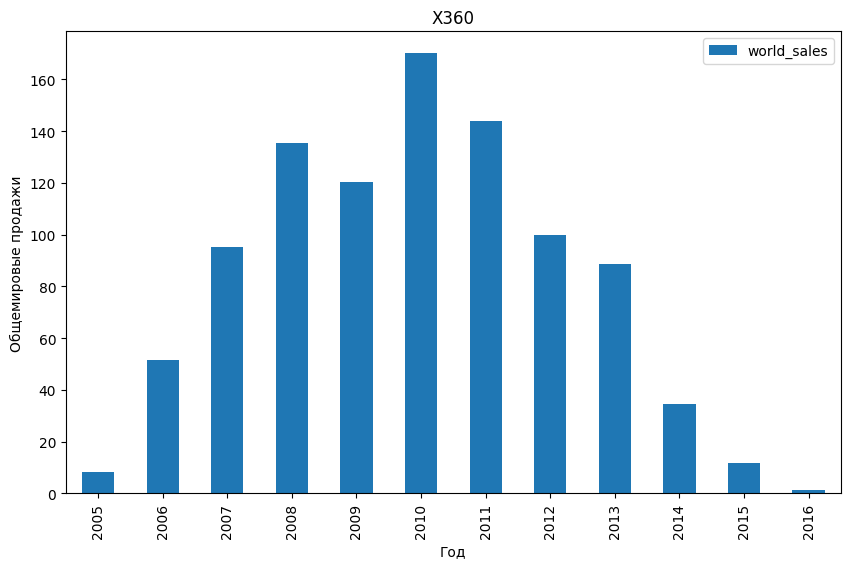

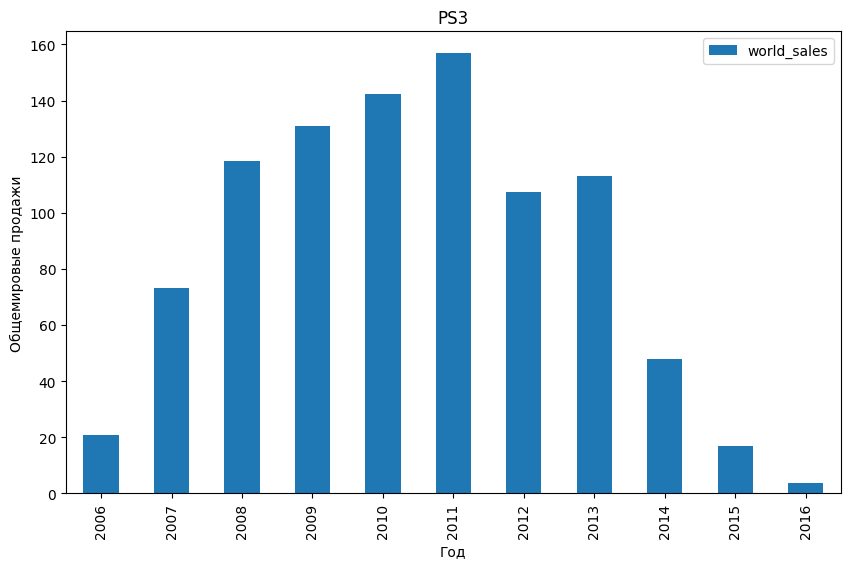

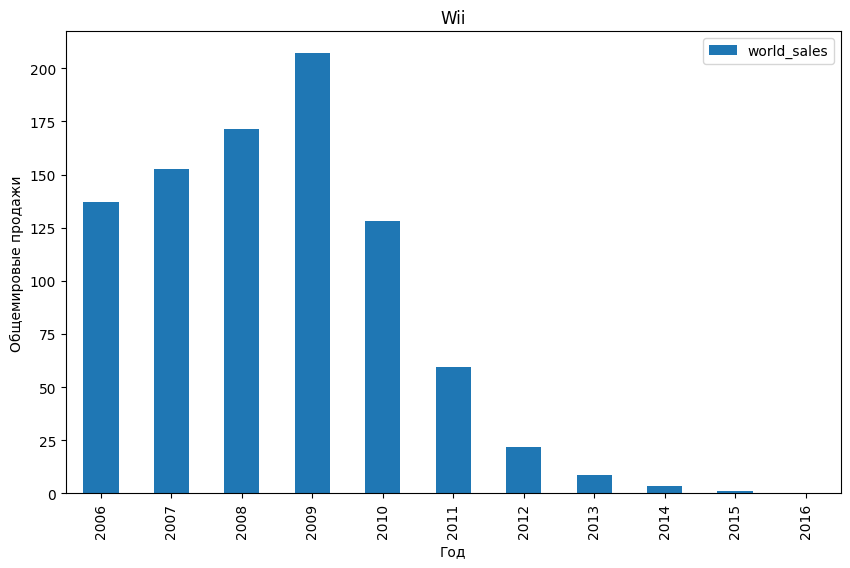

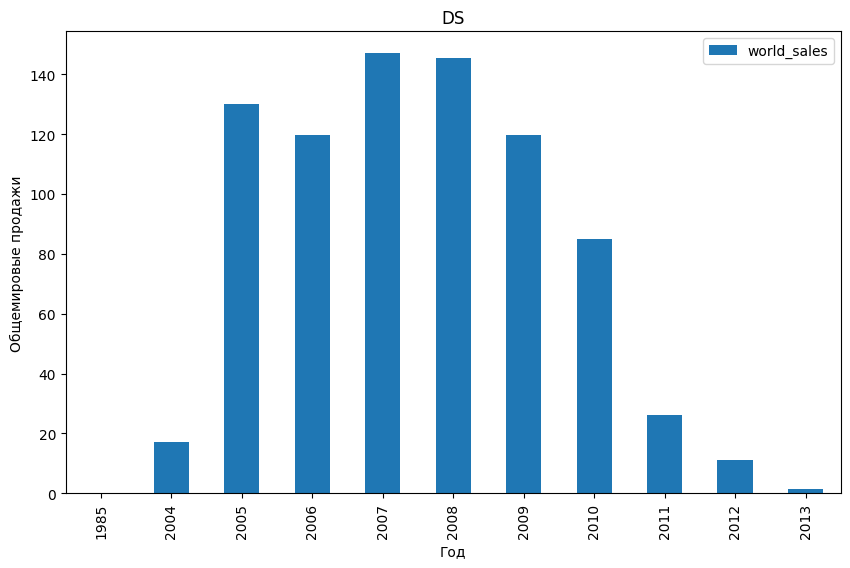

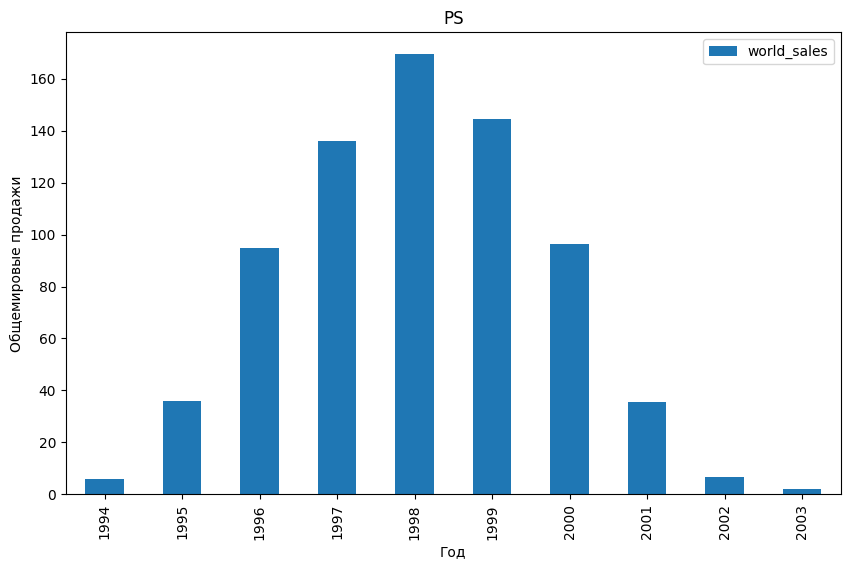

In [19]:
#берём 6 самых прибыльных платформ
best_platforms = list(platform_pivot.index[:6])
#строим диаграммы
for platform in best_platforms:
    data[data['platform'] == platform].pivot_table(index='year_of_release', values='world_sales', aggfunc='sum').plot(kind='bar', figsize=(10,6))
    plt.title(platform)
    plt.xlabel('Год')
    plt.ylabel('Общемировые продажи')

Исходя из информации, представленной на диаграммах распределения, можно заключить, что обычно игровые платформы сохраняют свою актуальность в течение приблизительно 8-10 лет. На момент 2016 года, все изучаемые платформы уже потеряли актуальность.

Актуальными данными являются продажи игр с 2013(так как 2012 я бы ещё считал переходным) по 2016 год, так как здесь игры стали делать дольше и их поддержка и продажи тоже увеличились, в связи с чем, упало общее количество проданных игр.

In [20]:
#берём выборку с актуальными данными
actual_data = data.query('year_of_release > 2012')
#очищаем выборку для удобства работы
actual_data = actual_data.reset_index(drop=True)
actual_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2233 entries, 0 to 2232
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2233 non-null   object 
 1   platform         2233 non-null   object 
 2   year_of_release  2233 non-null   int64  
 3   genre            2233 non-null   object 
 4   na_sales         2233 non-null   float64
 5   eu_sales         2233 non-null   float64
 6   jp_sales         2233 non-null   float64
 7   other_sales      2233 non-null   float64
 8   critic_score     991 non-null    float64
 9   user_score       1192 non-null   float64
 10  rating           2233 non-null   object 
 11  world_sales      2233 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 209.5+ KB


Датафрейм с актуальными данными сократился с 16444 до 2233 строк.

In [21]:
#строим таблицу с актуальными данными продаж по платформам
best_platforms_actual = actual_data.pivot_table(index=['platform','year_of_release'], values='world_sales', aggfunc = 'sum')
best_platforms_actual

world_sales
platform year_of_release             
3DS      2013                   56.57
         2014                   43.76
         2015                   27.78
         2016                   15.14
DS       2013                    1.54
PC       2013                   12.38
         2014                   13.28
         2015                    8.52
         2016                    5.25
PS3      2013                  113.25
         2014                   47.76
         2015                   16.82
         2016                    3.60
PS4      2013                   25.99
         2014                  100.00
         2015                  118.90
         2016                   69.25
PSP      2013                    3.14
         2014                    0.24
         2015                    0.12
PSV      2013                   10.59
         2014                   11.90
         2015                    6.25
         2016                    4.25
Wii      2013                    8.59
         2014                    3.75
         2015                    1.14
         2016                    0.18
WiiU     2013                   21.65
         2014                   22.03
         2015                   16.35
         2016                    4.60
X360     2013                   88.58
         2014                   34.74
         2015                   11.96
         2016                    1.52
XOne     2013                   18.96
         2014                   54.07
         2015                   60.14
         2016                   26.15

WiiU, PS4, XOne и 3DS являются самыми прибыльными платформами последних лет, хоть ни одна платформа не показала рост в 2016 по сравнению с 2015, это скорее из-за упадка всей индустрии. Остальные платформы либо заканчивают свой жизненный цикл(PS3, X360), либо приносят мало прибыли(PC(во многом из-за проблем с "пиратством" нежели с популярностью платформы) и PSV).

count    2233.000000
mean        0.488442
std         1.235226
min         0.010000
25%         0.030000
50%         0.110000
75%         0.400000
max        21.050000
Name: world_sales, dtype: float64

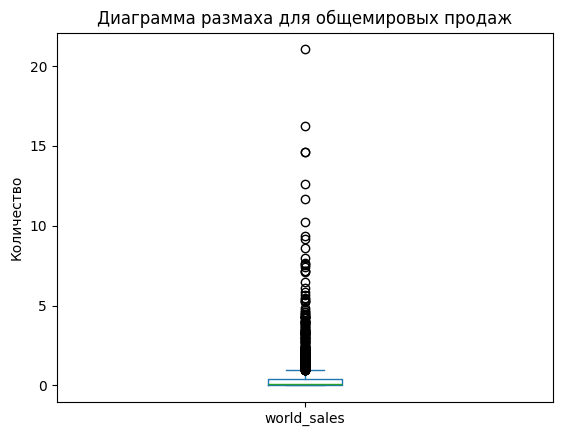

In [22]:
#Построим диаграмму размаха для общемировых продаж
actual_data.plot(kind = 'box', y = 'world_sales', title = 'Диаграмма размаха для общемировых продаж', ylabel = 'Количество')
actual_data['world_sales'].describe()

Далее стоит построить её для самых популярных актуальных платформ(PS4, XOne, 3DS)

count    392.000000
mean       0.801378
std        1.609456
min        0.010000
25%        0.060000
50%        0.200000
75%        0.730000
max       14.630000
Name: world_sales, dtype: float64

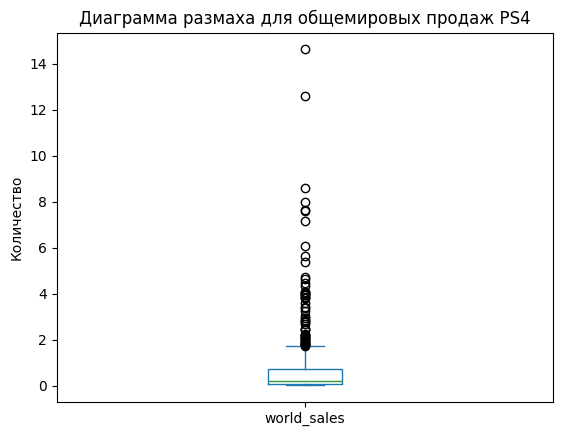

In [23]:
#строим диаграмму размаха для платформы PS4
PS4_actual_data = actual_data.query('platform =="PS4"')
PS4_actual_data.plot(kind = 'box', y = 'world_sales', title = 'Диаграмма размаха для общемировых продаж PS4', ylabel = 'Количество')
PS4_actual_data['world_sales'].describe()

<Axes: title={'center': 'Диаграмма размаха для общемировых продаж PS4'}, ylabel='Количество'>

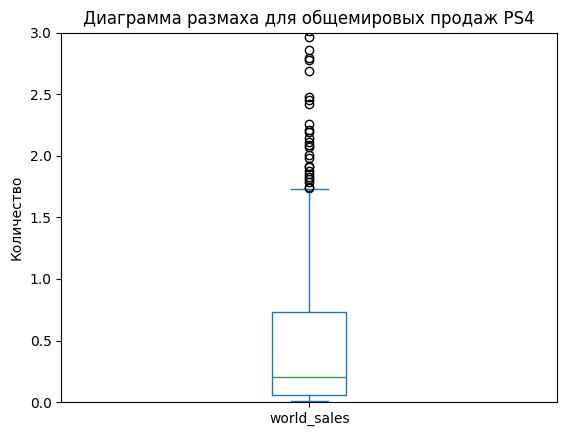

In [24]:
#строим дополнительный график с нижней частью boxplota
PS4_actual_data.plot(kind = 'box', y = 'world_sales',ylim = (0, 3) , title = 'Диаграмма размаха для общемировых продаж PS4', ylabel = 'Количество')

Исходя из предоставленных данных, средняя выручка на игру на платформе PS4 составляет 801 тысячу. Три четверти (3/4) игр заработали менее 730 тысяч, а самая высокая выручка составила 14,6 миллионов. Эти цифры указывают на то, что на платформе PS4 существует широкий разброс в выручке от игр, и большинство игр зарабатывает менее 730 тысяч, но есть и несколько игр, которые достигают очень высокой выручки, включая рекордные 14,6 миллионов.

count    247.000000
mean       0.645020
std        1.036139
min        0.010000
25%        0.060000
50%        0.220000
75%        0.685000
max        7.390000
Name: world_sales, dtype: float64

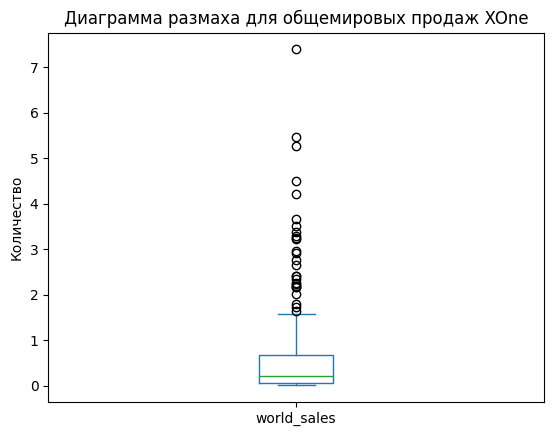

In [25]:
#строим диаграмму размаха для платформы XOne
XOne_actual_data = actual_data.query('platform =="XOne"')
XOne_actual_data.plot(kind = 'box', y = 'world_sales', title = 'Диаграмма размаха для общемировых продаж XOne', ylabel = 'Количество')
XOne_actual_data['world_sales'].describe()

<Axes: title={'center': 'Диаграмма размаха для общемировых продаж XOne'}, ylabel='Количество'>

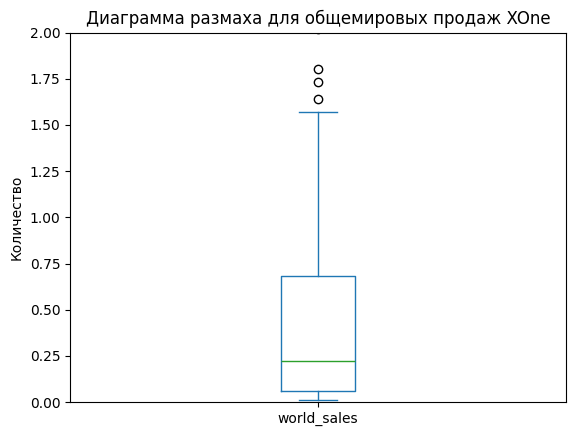

In [26]:
#строим дополнительный график с нижней частью boxplota
XOne_actual_data.plot(kind = 'box', y = 'world_sales',ylim = (0, 2) , title = 'Диаграмма размаха для общемировых продаж XOne', ylabel = 'Количество')

На платформе XOne средняя выручка на игру составляет 645 тысяч. Три четверти (3/4) игр заработали менее 685 тысяч, а самая высокая выручка достигла 7,4 миллионов. Эти данные также указывают на разнообразие в выручке от игр на платформе XOne, где большинство игр зарабатывает менее 685 тысяч, но есть несколько успешных игр, которые принесли значительно больше.

count    303.000000
mean       0.472772
std        1.381347
min        0.010000
25%        0.040000
50%        0.090000
75%        0.280000
max       14.600000
Name: world_sales, dtype: float64

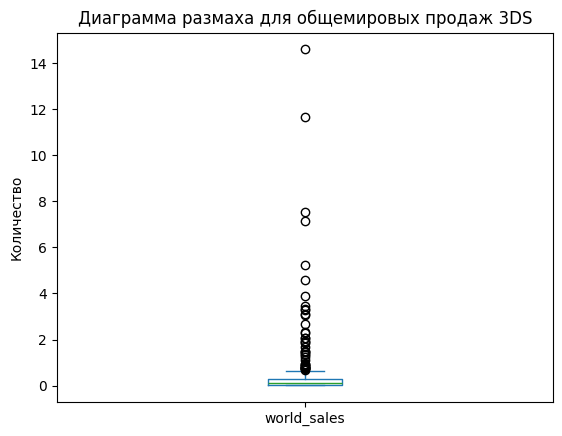

In [27]:
#строим диаграмму размаха для платформы 3DS
_3DS_actual_data = actual_data.query('platform =="3DS"')
_3DS_actual_data.plot(kind = 'box', y = 'world_sales', title = 'Диаграмма размаха для общемировых продаж 3DS', ylabel = 'Количество')
_3DS_actual_data['world_sales'].describe()

<Axes: title={'center': 'Диаграмма размаха для общемировых продаж 3DS'}, ylabel='Количество'>

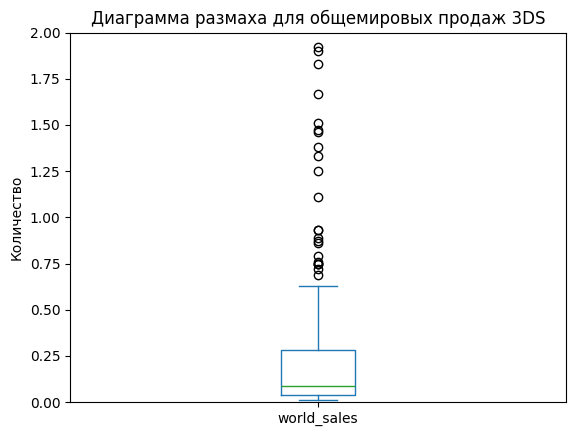

In [28]:
#строим дополнительный график с нижней частью boxplota
_3DS_actual_data.plot(kind = 'box', y = 'world_sales',ylim = (0, 2) , title = 'Диаграмма размаха для общемировых продаж 3DS', ylabel = 'Количество')

Средняя выручка на игру на платформе 3DS составляет 472 тысячи. Три четверти (3/4) игр заработали менее 280 тысяч, а самая высокая выручка достигла 14,6 миллионов. Эти данные указывают на значительный разброс в выручке от игр на платформе 3DS, где большинство игр приносит менее 280 тысяч, но есть несколько игр, которые добиваются очень высокой выручки, включая рекордные 14,6 миллиона.

Вывод: 
Различия в объемах продаж существенны. На рынке существует лишь небольшое количество игр, которые продолжают успешно продаваться годами и обеспечивают высокую прибыль. Большинство игр, в то же время, не смогли достичь порога в 400 тысяч долларов продаж за определенный период.


In [29]:
#для следующего исследования возьмём данные по самой популярной актуальной платформе - PS4
PS4_corr = PS4_actual_data.loc[:,['world_sales', 'critic_score', 'user_score']]
PS4_corr.head(10)

,world_sales,critic_score,user_score
2,14.63,NaN,NaN
4,12.62,97.0,8.3
9,8.58,82.0,4.3
10,7.98,NaN,NaN
11,7.66,83.0,5.7
12,7.60,85.0,5.0
15,7.17,87.0,6.5
19,6.08,82.0,5.7
21,5.64,76.0,6.1
23,5.39,93.0,7.9


In [30]:
#построим корреляцию
PS4_corr.corr()

,world_sales,critic_score,user_score
world_sales,1.000000,0.406568,-0.031957
critic_score,0.406568,1.000000,0.557654
user_score,-0.031957,0.557654,1.000000


array([[<Axes: xlabel='world_sales', ylabel='world_sales'>,
        <Axes: xlabel='critic_score', ylabel='world_sales'>,
        <Axes: xlabel='user_score', ylabel='world_sales'>],
       [<Axes: xlabel='world_sales', ylabel='critic_score'>,
        <Axes: xlabel='critic_score', ylabel='critic_score'>,
        <Axes: xlabel='user_score', ylabel='critic_score'>],
       [<Axes: xlabel='world_sales', ylabel='user_score'>,
        <Axes: xlabel='critic_score', ylabel='user_score'>,
        <Axes: xlabel='user_score', ylabel='user_score'>]], dtype=object)

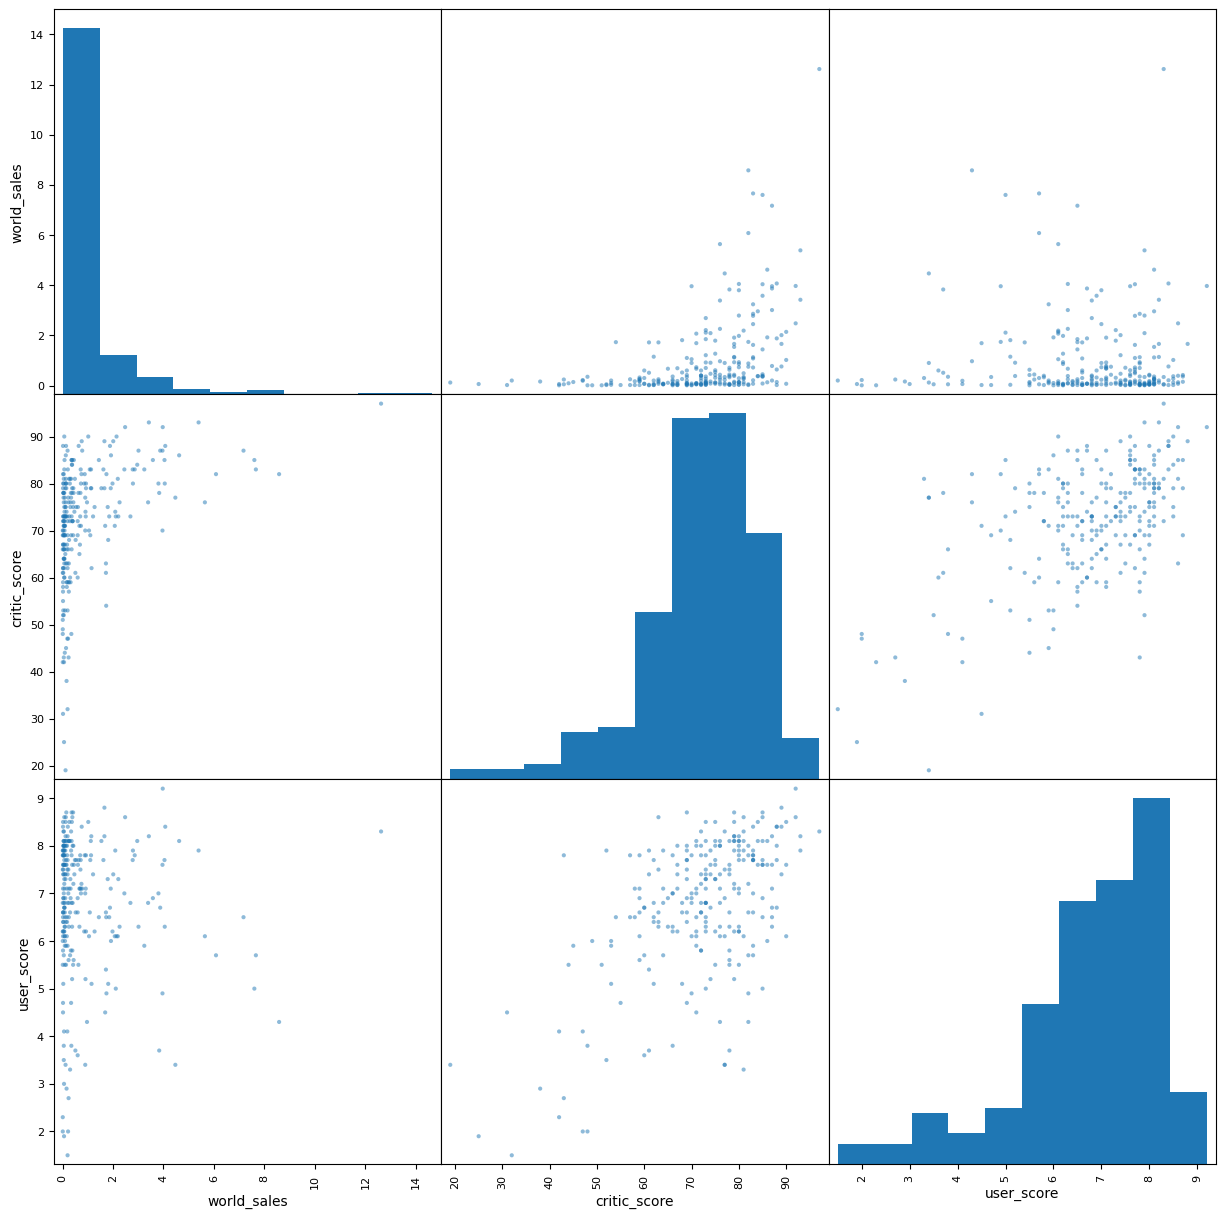

In [31]:
#построим диаграмму рассеивания
pd.plotting.scatter_matrix(PS4_corr, figsize=(15, 15))

Для платформы PS4 качество игры является важным фактором, и поэтому существует прямая связь между прибылью и оценками критиков. В то же время, обратная корреляция с мнением игроков не имеет смысла.

Важно отметить, что мнение игроков в значительной степени зависит от рейтинга. Иными словами, чем выше оценка игры со стороны критиков, тем выше оценку игра получит от игроков.

In [32]:
#возьмём данные другой актуальной платформе - XOne
XOne_corr = XOne_actual_data.loc[:,['world_sales', 'critic_score', 'user_score']]
XOne_corr.head(10)

,world_sales,critic_score,user_score
14,7.39,NaN,NaN
22,5.47,97.0,7.9
24,5.26,81.0,5.4
31,4.49,84.0,6.4
39,4.22,88.0,6.2
52,3.66,NaN,NaN
55,3.50,72.0,4.1
61,3.37,75.0,5.5
65,3.28,82.0,7.5
66,3.25,84.0,4.4


In [33]:
#построим корреляцию
XOne_corr.corr()

,world_sales,critic_score,user_score
world_sales,1.000000,0.416998,-0.068925
critic_score,0.416998,1.000000,0.472462
user_score,-0.068925,0.472462,1.000000


array([[<Axes: xlabel='world_sales', ylabel='world_sales'>,
        <Axes: xlabel='critic_score', ylabel='world_sales'>,
        <Axes: xlabel='user_score', ylabel='world_sales'>],
       [<Axes: xlabel='world_sales', ylabel='critic_score'>,
        <Axes: xlabel='critic_score', ylabel='critic_score'>,
        <Axes: xlabel='user_score', ylabel='critic_score'>],
       [<Axes: xlabel='world_sales', ylabel='user_score'>,
        <Axes: xlabel='critic_score', ylabel='user_score'>,
        <Axes: xlabel='user_score', ylabel='user_score'>]], dtype=object)

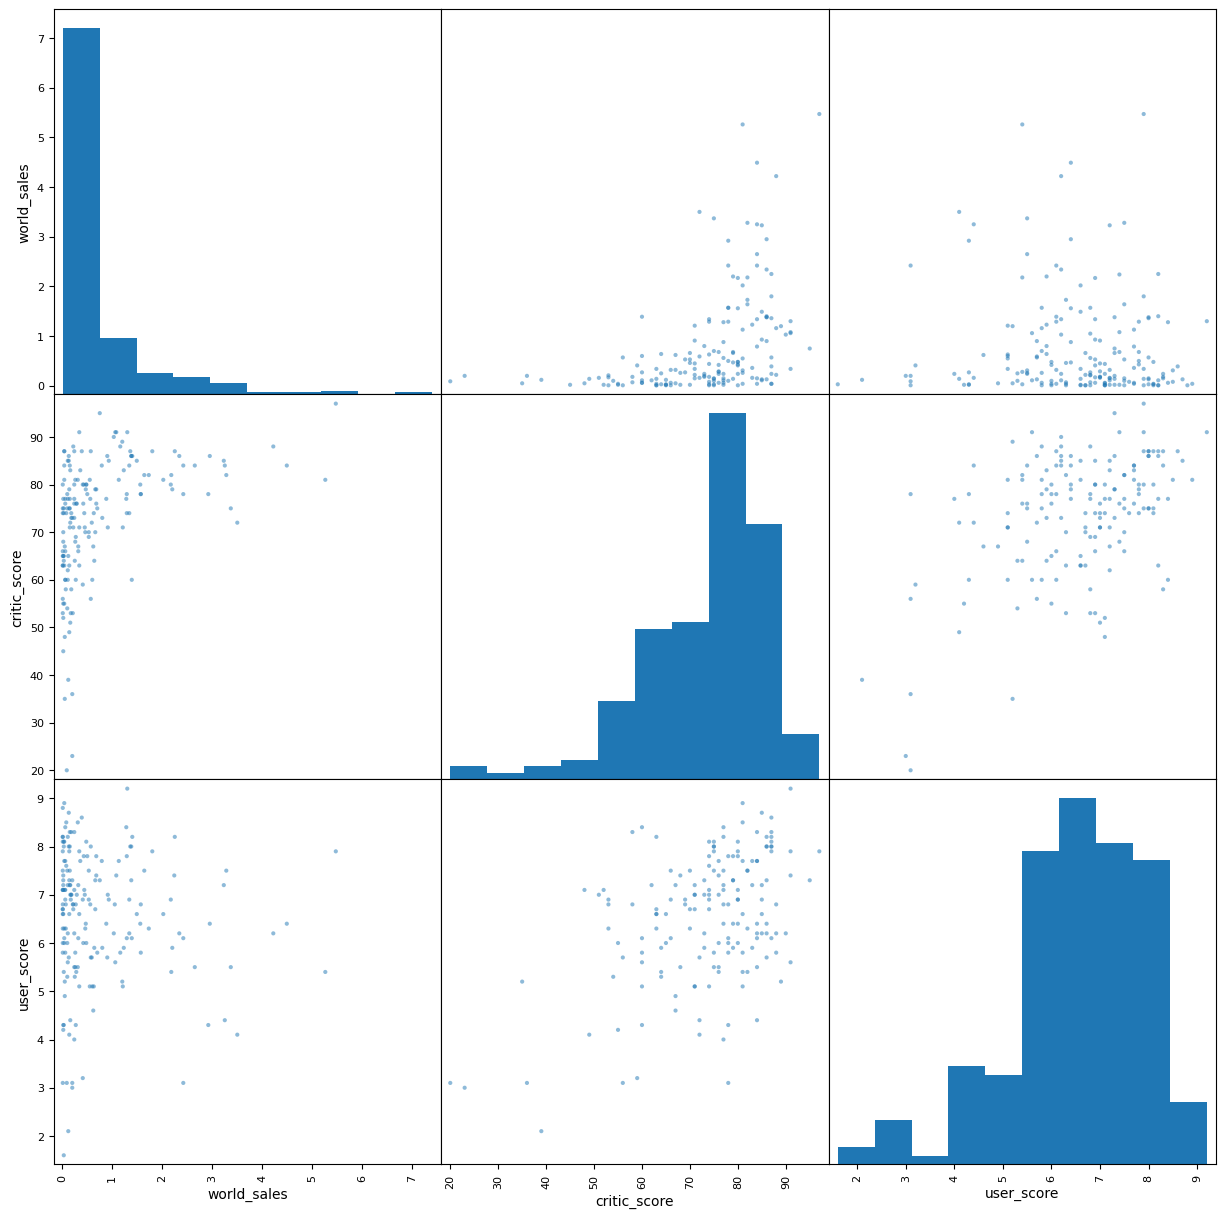

In [34]:
#построим диаграмму рассеивания
pd.plotting.scatter_matrix(XOne_corr, figsize=(15, 15))

Наблюдаются те же закономерности, что и у PS4.

In [35]:
#возьмём данные другой актуальной платформе - 3DS
_3DS_corr = _3DS_actual_data.loc[:,['world_sales', 'critic_score', 'user_score']]
_3DS_corr.head(10)

,world_sales,critic_score,user_score
3,14.60,NaN,NaN
5,11.68,NaN,NaN
13,7.55,NaN,NaN
16,7.14,NaN,NaN
26,5.22,NaN,NaN
30,4.59,86.0,8.4
47,3.89,86.0,8.7
58,3.44,NaN,NaN
62,3.32,NaN,NaN
64,3.28,NaN,NaN


In [36]:
#построим корреляцию
_3DS_corr.corr()

,world_sales,critic_score,user_score
world_sales,1.000000,0.357057,0.241504
critic_score,0.357057,1.000000,0.769536
user_score,0.241504,0.769536,1.000000


array([[<Axes: xlabel='world_sales', ylabel='world_sales'>,
        <Axes: xlabel='critic_score', ylabel='world_sales'>,
        <Axes: xlabel='user_score', ylabel='world_sales'>],
       [<Axes: xlabel='world_sales', ylabel='critic_score'>,
        <Axes: xlabel='critic_score', ylabel='critic_score'>,
        <Axes: xlabel='user_score', ylabel='critic_score'>],
       [<Axes: xlabel='world_sales', ylabel='user_score'>,
        <Axes: xlabel='critic_score', ylabel='user_score'>,
        <Axes: xlabel='user_score', ylabel='user_score'>]], dtype=object)

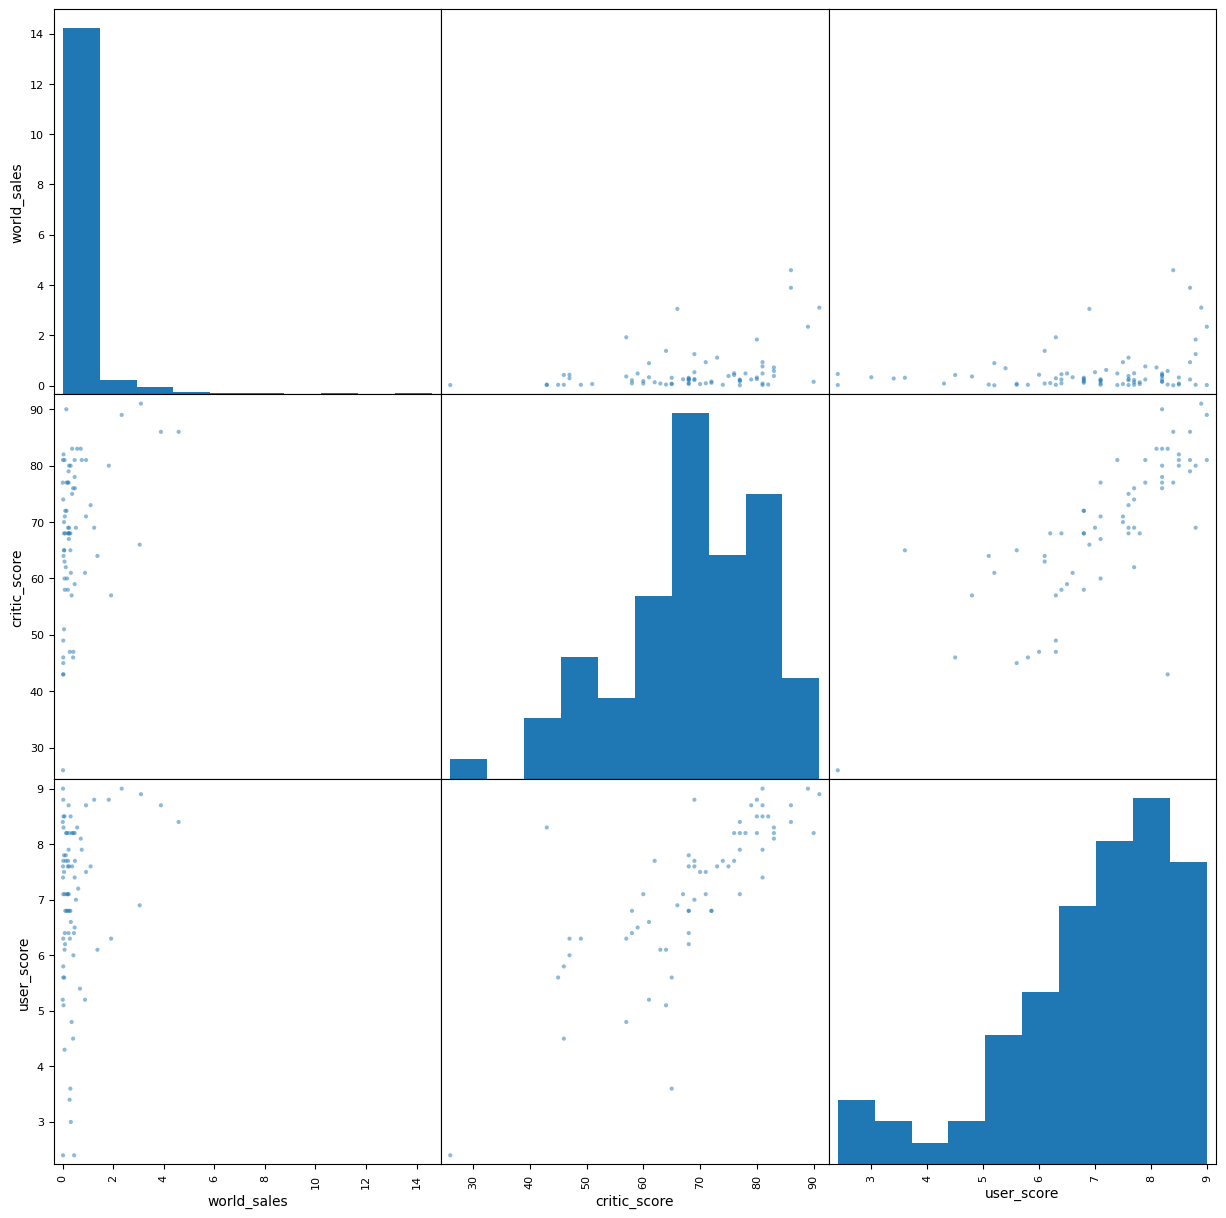

In [37]:
#построим диаграмму рассеивания
pd.plotting.scatter_matrix(_3DS_corr, figsize=(15, 15))

Особенностью 3DS является то, что ее продажи в значительной степени зависят от оценок игроков, хотя эта зависимость не настолько выражена. Возможно, это свидетельствует о более эффективной системе оценки игр и обратной связи от игроков. Также возможно, что игры на этой платформе в целом очень популярные и увлекательные, и их количество невелико по сравнению с другими платформами.

              world_sales
genre                    
Shooter             0.450
Sports              0.240
Platform            0.225
Role-Playing        0.125
Fighting            0.125
Racing              0.120
Action              0.110
Simulation          0.100
Misc                0.100
Strategy            0.080
Puzzle              0.060
Adventure           0.030


<Axes: title={'center': 'Количество продаж игр по жанрам'}, xlabel='Жанр', ylabel='Медианное значение общих продаж'>

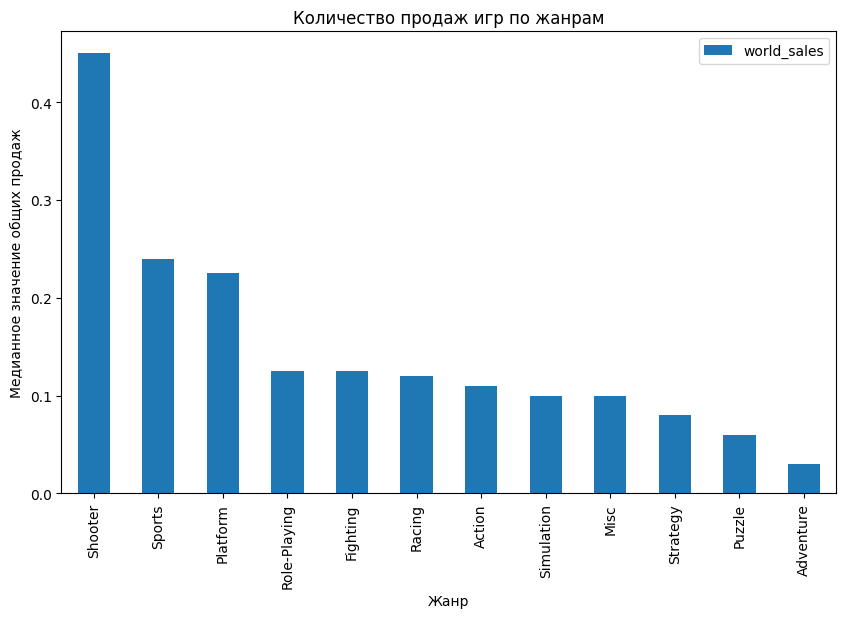

In [38]:
genre_pivot = actual_data.pivot_table(index='genre', values='world_sales', aggfunc='median')
genre_pivot = genre_pivot.sort_values('world_sales', ascending=False)
print(genre_pivot)
genre_pivot.plot(kind='bar', figsize = (10,6), title = 'Количество продаж игр по жанрам', xlabel = 'Жанр', ylabel = 'Медианное значение общих продаж')

<Axes: title={'center': 'Количество продаж игр по жанрам'}, xlabel='Жанр', ylabel='Медианное значение общих продаж'>

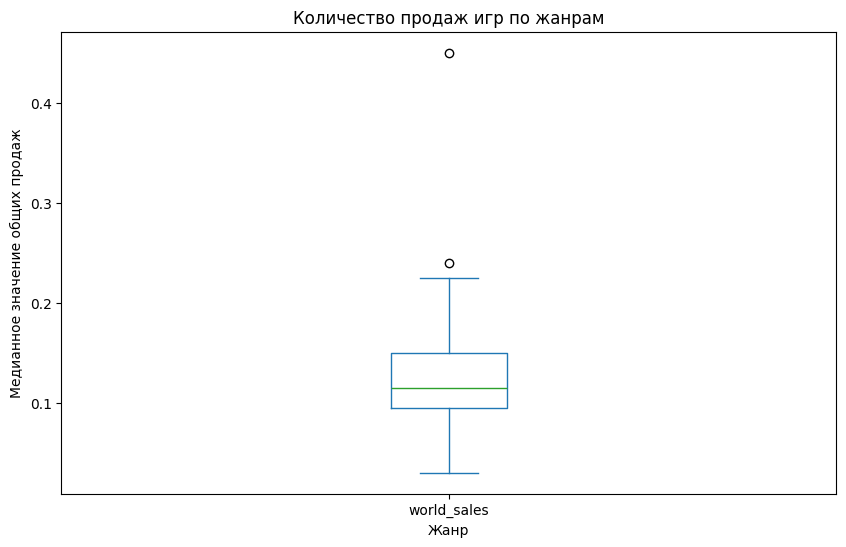

In [39]:
#строим boxplot
genre_pivot.plot(kind='box', figsize = (10,6), title = 'Количество продаж игр по жанрам', xlabel = 'Жанр', ylabel = 'Медианное значение общих продаж')

Самыми прибыльными жанрами в мире видеоигр можно назвать шутеры, спортивные игры и платформеры. 

Шутеры, спортивные игры пользуются популярностью благодаря возможности многопользовательской игры, что создает соревновательную среду с форматами 1x1, 2x2, 3x3, 5x5 и так далее.

Платформеры цепляют своей простотой и возможностью расслабиться после тяжелого дня.

Ролевые игры привлекают игроков своей глубокой историей, сложностью и возможностью прохождения игры несколько раз, что поддерживает интерес к дополнениям и обсуждению игры с друзьями.

С другой стороны, в период с 2013 по 2016 годы жанры приключения, симуляторы, стратегии в реальном времени или пошаговые и головоломки не были так популярными. Головоломки, хотя и имели популярность с 80-х годов, сейчас утратили свою привлекательность для текущего поколения, которое больше предпочитает динамичные игры. Приключенческие игры, хоть и появились позже, наблюдают похожий тренд.

Симуляторы, которые имитируют аспекты реальной жизни, могут быть интересны для тех, кто любит экспериментировать и творить.

Стратегические игры редко попадают в список лидеров по продажам из-за своей высокой сложности и иногда медленного темпа игры.

Вывод: 

Все заданные вопросы были достаточно полно исследованы, и каждое рассуждение подтверждено аргументами.

В общем выводе на 2017 год можно сказать, что ожидается увеличение объемов продаж на платформах PS4, XOne и 3DS. Это связано с тем, что множество игровых студий успешно адаптировали свои технологии под эти консоли и стремятся охватить различные рынки.

## Составляем портрет каждого пользователя региона

In [40]:
#подготавливаем данные по каждому региону
jp_actual_data = actual_data.query('jp_sales > 0')
eu_actual_data = actual_data.query('eu_sales > 0')
na_actual_data = actual_data.query('na_sales > 0')

,na_sales
platform,
PS4,108.74
XOne,93.12
X360,81.66
PS3,63.50
3DS,38.20
WiiU,29.21
PC,11.11
Wii,6.56
PSV,5.04


<Axes: title={'center': 'Количество продаж игр по платформам в регионе na'}, xlabel='Платформа', ylabel='Общие продажи'>

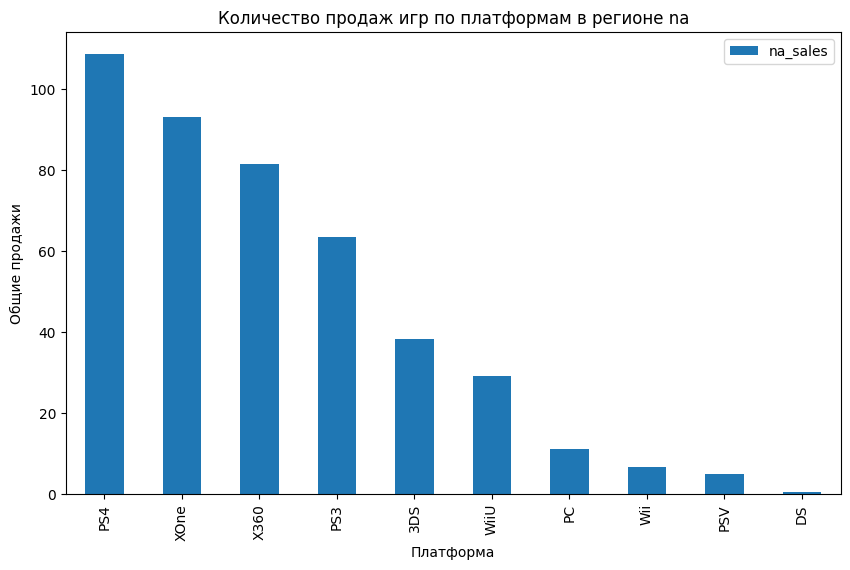

In [41]:
#изучаем самые популярные платформы в регионе
na_platform_pivot = na_actual_data.pivot_table(index='platform', values='na_sales', aggfunc='sum').sort_values('na_sales', ascending=False)
display (na_platform_pivot)
na_platform_pivot.plot(kind='bar', figsize = (10,6), title = 'Количество продаж игр по платформам в регионе na', xlabel = 'Платформа', ylabel = 'Общие продажи')

,eu_sales
platform,
PS4,141.09
PS3,67.81
XOne,51.59
X360,42.52
3DS,30.96
PC,25.36
WiiU,19.85
PSV,6.10
Wii,5.93


<Axes: title={'center': 'Количество продаж игр по платформам в регионе eu'}, xlabel='Платформа', ylabel='Общие продажи'>

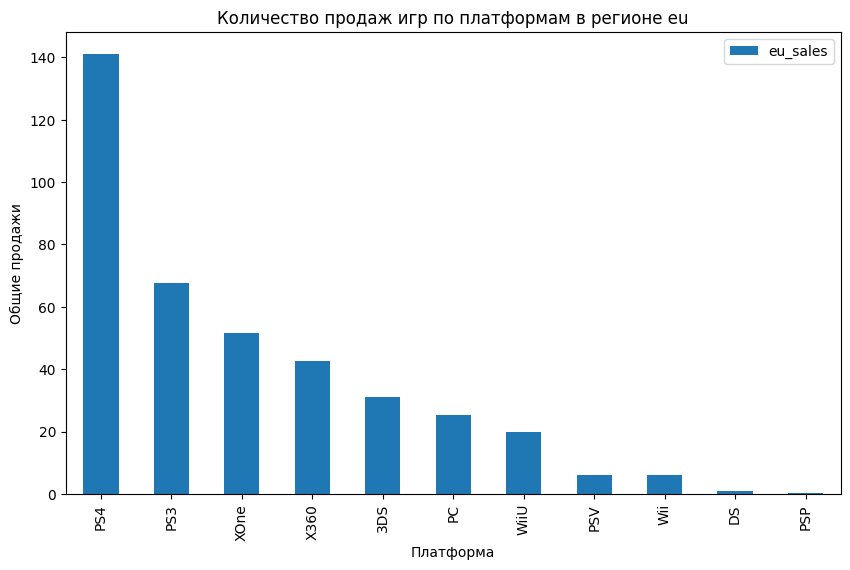

In [42]:
#изучаем самые популярные платформы в регионе
eu_platform_pivot = eu_actual_data.pivot_table(index='platform', values='eu_sales', aggfunc='sum').sort_values('eu_sales', ascending=False)
display (eu_platform_pivot)
eu_platform_pivot.plot(kind='bar', figsize = (10,6), title = 'Количество продаж игр по платформам в регионе eu', xlabel = 'Платформа', ylabel = 'Общие продажи')

,jp_sales
platform,
3DS,67.81
PS3,23.35
PSV,18.59
PS4,15.96
WiiU,10.88
PSP,3.29
X360,0.51
XOne,0.34
Wii,0.05


<Axes: title={'center': 'Количество продаж игр по платформам в регионе jp'}, xlabel='Платформа', ylabel='Общие продажи'>

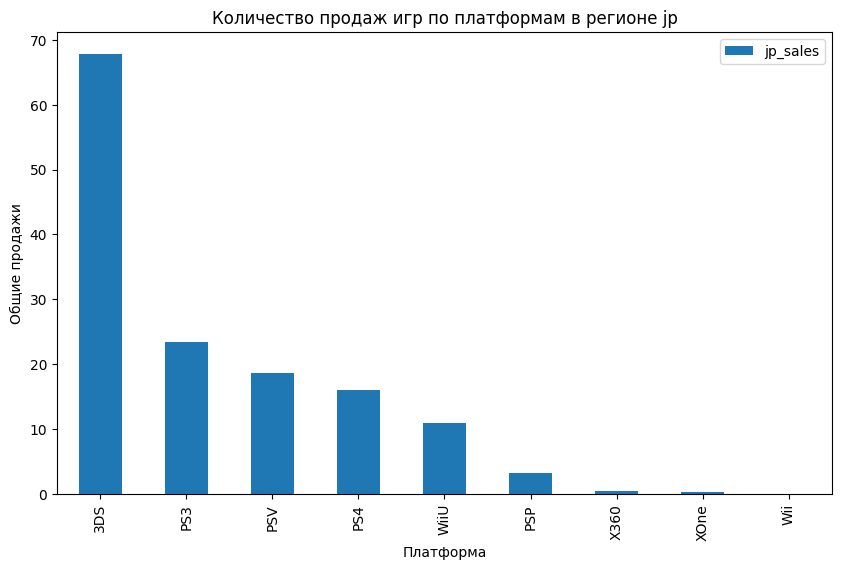

In [43]:
#изучаем самые популярные платформы в регионе
jp_platform_pivot = jp_actual_data.pivot_table(index='platform', values='jp_sales', aggfunc='sum').sort_values('jp_sales', ascending=False)
display (jp_platform_pivot)
jp_platform_pivot.plot(kind='bar', figsize = (10,6), title = 'Количество продаж игр по платформам в регионе jp', xlabel = 'Платформа', ylabel = 'Общие продажи')

Рейтинг популярности игровых платформ в разных регионах следующий:

В Северной Америке Топ 5 включает в себя PS4, XOne, X360, PS3 и 3DS.

В Европейском регионе лидируют PS4, PS3, XOne, X360 и 3DS.

В Японии наиболее популярны 3DS, PS3, PSV, PS4 и WiiU.

Эти различия в популярности платформ можно объяснить несколькими факторами. Во-первых, влияние фирмы-производителя играет важную роль, и поэтому в каждом рейтинге есть продукты от компании Sony.

Во-вторых, местоположение компании также влияет на популярность платформы. Например, XOne и X360 популярны в Северной Америке благодаря влиянию Microsoft на этом рынке, а Nintendo с платформами 3DS и WiiU занимают сильное положение на рынке в Японии. В Европе ситуация разнообразнее, и выбор платформы зависит в большей степени от ее общей популярности, так как нет крупных игроков, контролирующих региональный рынок.

На американском рынке наблюдается соревнование между PS4 и XOne, что связано с активными усилиями компании Microsoft не уступать в продажах на своем родном рынке. В Европе PS4 лидирует без сильной конкуренции, так как ее продукт пользуется широкой популярностью. В Японии Nintendo и Sony борются за пользователей, и хотя Nintendo успешна на родном рынке, ей сложно конкурировать за пределами Японии из-за относительно небольшого числа игроков.

,na_sales
genre,
Action,126.05
Shooter,109.74
Sports,65.27
Role-Playing,46.40
Misc,27.49
Platform,18.14
Fighting,15.55
Racing,12.96
Adventure,7.14


<Axes: title={'center': 'Количество продаж игр по жанрам в регионе na'}, xlabel='Жанр', ylabel='Общие продажи'>

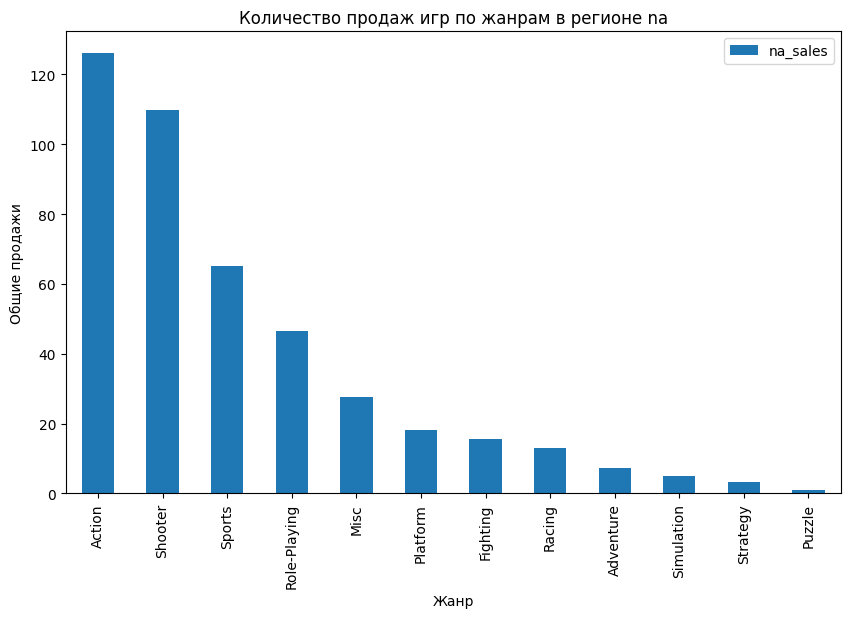

In [44]:
#изучаем самые популярные жанры в регионе
na_genre_pivot = na_actual_data.pivot_table(index='genre', values='na_sales', aggfunc='sum').sort_values('na_sales', ascending=False)
display (na_genre_pivot)
na_genre_pivot.plot(kind='bar', figsize = (10,6), title = 'Количество продаж игр по жанрам в регионе na', xlabel = 'Жанр', ylabel = 'Общие продажи')

,eu_sales
genre,
Action,118.13
Shooter,87.86
Sports,60.52
Role-Playing,36.97
Racing,20.19
Misc,20.04
Platform,15.58
Simulation,10.92
Fighting,8.55


<Axes: title={'center': 'Количество продаж игр по жанрам в регионе eu'}, xlabel='Жанр', ylabel='Общие продажи'>

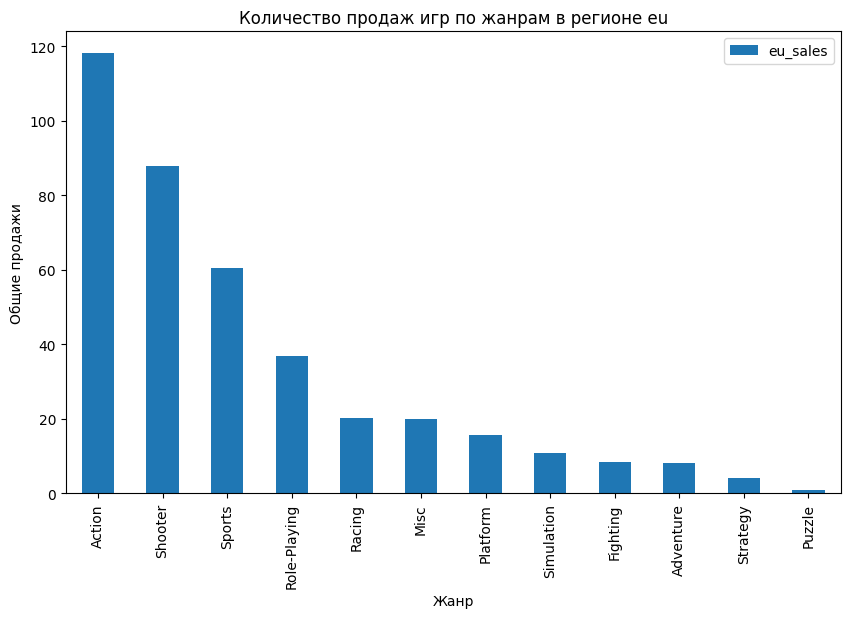

In [45]:
#изучаем самые популярные жанры в регионе
eu_genre_pivot = eu_actual_data.pivot_table(index='genre', values='eu_sales', aggfunc='sum').sort_values('eu_sales', ascending=False)
display(eu_genre_pivot)
eu_genre_pivot.plot(kind='bar', figsize = (10,6), title = 'Количество продаж игр по жанрам в регионе eu', xlabel = 'Жанр', ylabel = 'Общие продажи')

,jp_sales
genre,
Role-Playing,51.04
Action,40.49
Misc,9.20
Fighting,7.65
Shooter,6.61
Adventure,5.82
Sports,5.41
Platform,4.79
Simulation,4.52


<Axes: title={'center': 'Количество продаж игр по жанрам в регионе jp'}, xlabel='Жанр', ylabel='Общие продажи'>

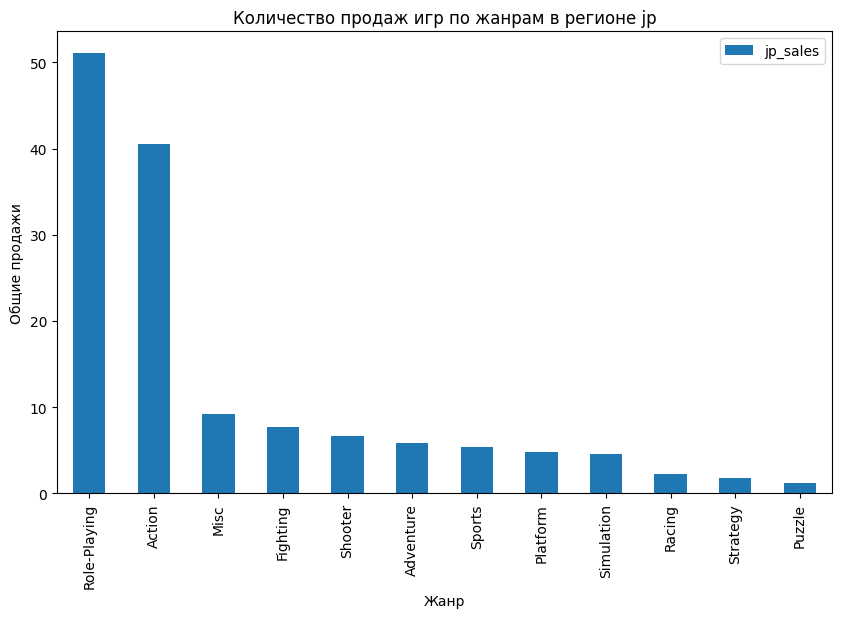

In [46]:
#изучаем самые популярные жанры в регионе
jp_genre_pivot = jp_actual_data.pivot_table(index='genre', values='jp_sales', aggfunc='sum').sort_values('jp_sales', ascending=False)
display (jp_genre_pivot)
jp_genre_pivot.plot(kind='bar', figsize = (10,6), title = 'Количество продаж игр по жанрам в регионе jp', xlabel = 'Жанр', ylabel = 'Общие продажи')

Рейтинг жанров видеоигр в разных регионах следующий:

В Северной Америке Топ 5 жанров включает в себя Action, Shooter, Sports, Role-Playing и Misc.

В Европейском регионе лидируют Action, Shooter, Sports, Role-Playing и Racing.

В Японии наиболее популярны Role-Playing, Action, Misc, Fighting и Shooter.

Жанр Miscellaneous game (Misc), согласно классификации Кроуфорда, относится к играм, требующим навыков и активности игрока. Он не включает в себя боевые игры (Combat), лабиринты (Maze), спортивные игры (Sports), игры с мячом (Paddle) или гонки (Race). Это новые игры, которые проверяют ловкость и реакцию игрока с использованием других методов.

В целом, американские и европейские игроки имеют схожие предпочтения по жанрам. В то время как японские игроки выделяются большим интересом к играм с глубоким сюжетом и смыслом. Независимо от региона, жанры экшен и шутер всегда остаются популярными, поскольку многие игроки в разных поколениях выросли на таких играх, и они имитируют боевые действия.

,na_sales
rating,
M,184.77
E,102.09
T,96.61
E10+,54.24


<Axes: title={'center': 'Количество продаж игр по возрастному рейтингу в регионе na'}, xlabel='Рейтинг', ylabel='Общие продажи'>

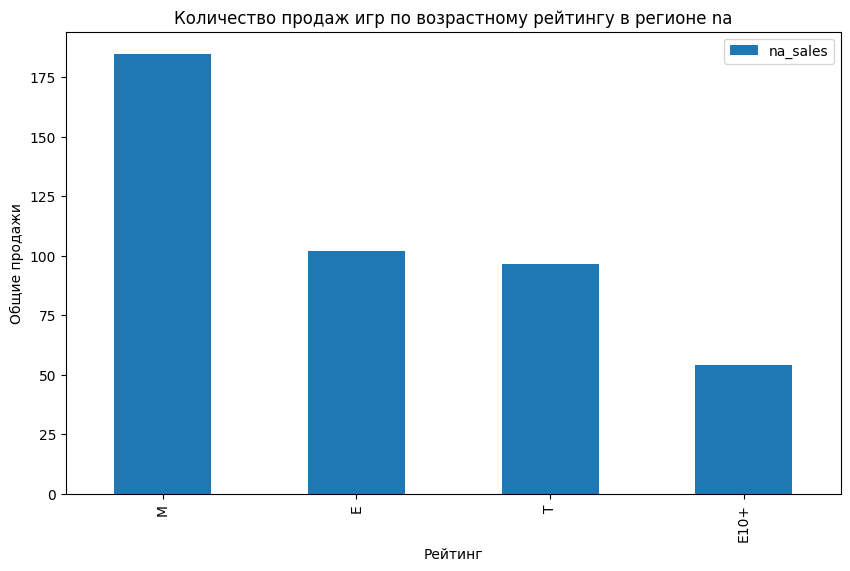

In [47]:
#изучаем самые популярный рейтинг в регионе
na_rating_pivot = na_actual_data.pivot_table(index='rating', values='na_sales', aggfunc='sum').sort_values('na_sales', ascending=False)
display (na_rating_pivot)
na_rating_pivot.plot(kind='bar', figsize = (10,6), title = 'Количество продаж игр по возрастному рейтингу в регионе na', xlabel = 'Рейтинг', ylabel = 'Общие продажи')

,eu_sales
rating,
M,162.21
E,108.37
T,78.96
E10+,42.69


<Axes: title={'center': 'Количество продаж игр по возрастному рейтингу в регионе eu'}, xlabel='Рейтинг', ylabel='Общие продажи'>

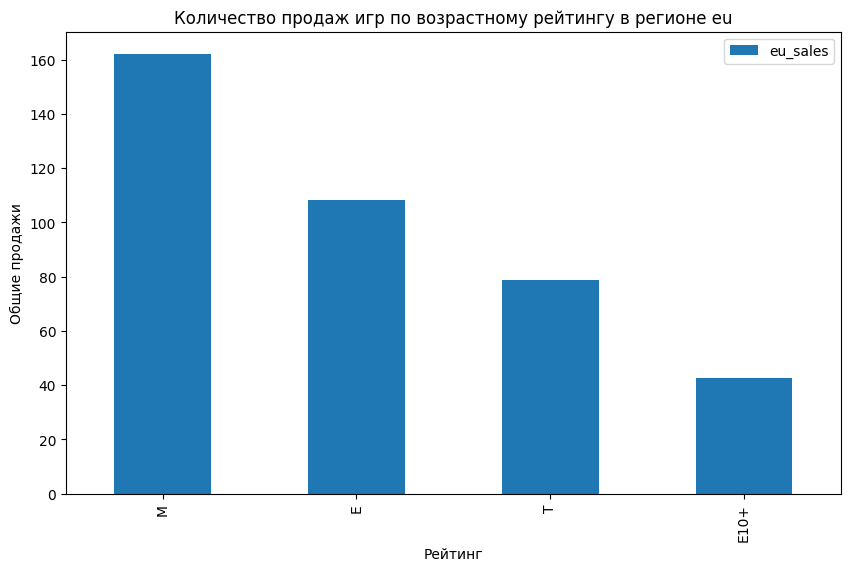

In [48]:
#изучаем самые популярный рейтинг в регионе
eu_rating_pivot = eu_actual_data.pivot_table(index='rating', values='eu_sales', aggfunc='sum').sort_values('eu_sales', ascending=False)
display (eu_rating_pivot)
eu_rating_pivot.plot(kind='bar', figsize = (10,6), title = 'Количество продаж игр по возрастному рейтингу в регионе eu', xlabel = 'Рейтинг', ylabel = 'Общие продажи')

,jp_sales
rating,
T,86.62
E,33.35
M,14.92
E10+,5.89


<Axes: title={'center': 'Количество продаж игр по возрастному рейтингу в регионе jp'}, xlabel='Рейтинг', ylabel='Общие продажи'>

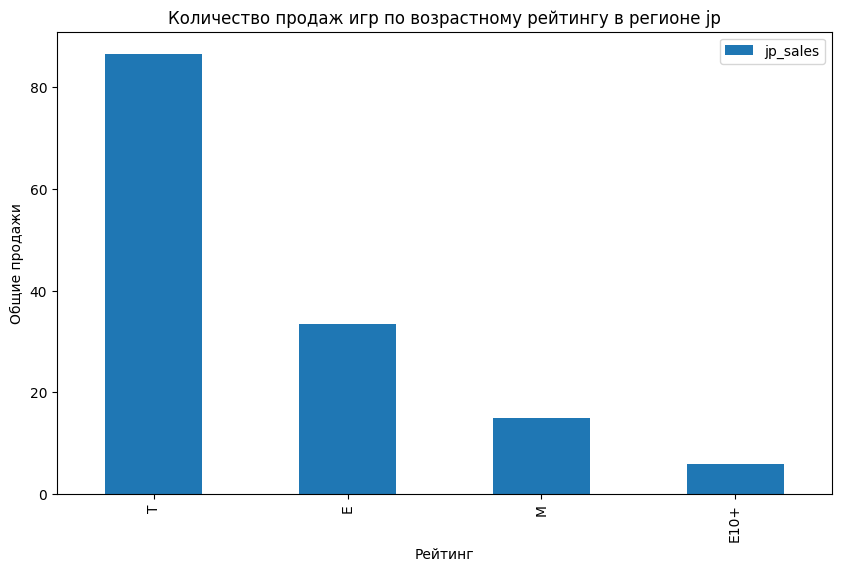

In [49]:
#изучаем самые популярный рейтинг в регионе
jp_rating_pivot = jp_actual_data.pivot_table(index='rating', values='jp_sales', aggfunc='sum').sort_values('jp_sales', ascending=False)
display (jp_rating_pivot)
jp_rating_pivot.plot(kind='bar', figsize = (10,6), title = 'Количество продаж игр по возрастному рейтингу в регионе jp', xlabel = 'Рейтинг', ylabel = 'Общие продажи')


Рейтинг возраста игр имеет влияние на предпочтения в каждом из регионов.

В Северной Америке и Европе наблюдается схожая тенденция: наиболее популярны игры с возрастным рейтингом 17+. Это указывает на то, что эти рынки ориентированы на взрослую аудиторию.

В Японии, напротив, лидируют игры с возрастным рейтингом 13+. Это свидетельствует о стремлении компаний оказать влияние на новое поколение игроков.

Проведя анализ по разным регионам, можно выделить основные характеристики игроков в каждом из них:

1. **Американский игрок:** Возраст - от 17 лет и старше. Предпочтительные платформы - PS4 или XOne. Любит игры, где требуется быстрая реакция, а также шутеры.

2. **Европейский игрок:** Возраст - от 17 лет и старше. Предпочтительная платформа - PS4. Предпочтение отдается играм, где важна реакция, а также шутерам.

3. **Японский игрок:** Возраст - от 13 лет и старше. Предпочтительные переносные платформы - 3DS или PSV. Любит игры жанра RPG (ролевые игры) и экшены.

## Проверка гипотез

№5.1

Нулевая гипотеза (H0): Средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Это предположение, которое проверяется на схожесть.

Альтернативная гипотеза (H1): Средние пользовательские рейтинги платформ Xbox One и PC различаются. Это предположение, которое мы хотим подтвердить или опровергнуть.

In [50]:
#Подготавливаем данные для проверки гипотезы
user_rating_XOne = actual_data.query('platform == "XOne"')['user_score'].dropna()
user_rating_PC = actual_data.query('platform == "PC"')['user_score'].dropna()

# Выполняем t-тест
t_statistic, p_value = stats.ttest_ind(user_rating_XOne, user_rating_PC)
# Оцениваем результаты теста
alpha = 0.05  # Уровень значимости
if p_value < alpha:
    print("Отвергаем нулевую гипотезу: Средние пользовательские рейтинги платформ Xbox One и PC различаются.")
else:
    print("Не отвергаем нулевую гипотезу: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.")
    
print("Значение p-value:", p_value)

Не отвергаем нулевую гипотезу: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
Значение p-value: 0.14012658403611647


Рейтинги имеют схожие характеристики, что подтверждает нулевая гипотеза.

Для проверки этих гипотез был использован t-тест. T-тест позволяет определить, есть ли статистически значимые различия между средними значениями двух выборок. В данном случае, мы применили t-тест, чтобы определить, различаются ли средние пользовательские рейтинги между платформами Xbox One и PC.

№5.2

Нулевая гипотеза (H0): Средние пользовательские рейтинги жанров Action и Sports одинаковые. Это предположение, которое проверяется на схожесть.

Альтернативная гипотеза (H1): Средние пользовательские рейтинги жанров Action и Sports разные. Это предположение, которое мы хотим подтвердить или опровергнуть.

In [51]:
#Подготавливаем данные для проверки гипотезы
user_rating_Action = actual_data.query('genre == "Action"')['user_score'].dropna()
user_rating_Sports = actual_data.query('genre == "Sports"')['user_score'].dropna()

# Выполняем t-тест
t_statistic, p_value = stats.ttest_ind(user_rating_Action, user_rating_Sports)
# Оцениваем результаты теста
alpha = 0.05  # Уровень значимости
if p_value < alpha:
    print("Отвергаем нулевую гипотезу: Средние пользовательские рейтинги жанров Action и Sports разные.")
else:
    print("Не отвергаем нулевую гипотезу: Средние пользовательские рейтинги жанров Action и Sports одинаковые.")
    
print("Значение p-value:", p_value)

Отвергаем нулевую гипотезу: Средние пользовательские рейтинги жанров Action и Sports разные.
Значение p-value: 1.0517832389140023e-27


Наша гипотеза так же подтвердилась, средние рейтинги у этих 2 жанров разные.

Для проверки этих гипотез был использован t-тест. T-тест позволяет определить, есть ли статистически значимые различия между средними значениями двух выборок. В данном случае, мы применили t-тест, чтобы определить, различаются ли средние пользовательские рейтинги между жанрами Action и Sports.

Вывод:

Две гипотезы были подтверждены.

Платформа XOne усиливает свои усилия год от года, чтобы конкурировать не только с PS4, но и с самой распространенной игровой платформой на планете - ПК. Качество игр на этой платформе в 2016 году приближается к уровню компьютерных игр.

Различия между жанрами Action и Sports обусловлены опытом создания игр. Первые экшен-игры появились в 1980-х годах, и с годами они стали более интересными, так как имеют богатое наследие и многообразие в своем жанре. Спортивные игры, в большинстве случаев, стремятся к симуляции реальных спортивных событий, что иногда приводит к неясным решениям в этих играх, что может вызвать недопонимание у любителей данного жанра.

## Общий вывод

В рамках выполненных работ были осуществлены следующие этапы:

1. Проведено аналитическое исследование таблицы, выявлены аномалии и обнаружены пропущенные значения.

2. Произведена предварительная обработка таблицы, включая замену столбцов, заполнение пропусков и удаление дубликатов.

3. Проведен анализ данных и подготовлены актуальные сведения.

4. Созданы пользовательские профили для ключевых регионов продаж.

5. Осуществлены проверки гипотез, связанные с продажами компьютерных игр, учитывая требования к трём основным аспектам: разработчику игры, платформе и жанру.

Что касается первого аспекта, в настоящее время наибольшей популярностью пользуются компании с многолетним опытом в игровой индустрии. Они придерживаются своих стандартных жанров и уже имеют ограниченную, но постоянную аудиторию, которая гарантированно приобретет их продукт.

Что касается второго аспекта, выбор платформы напрямую влияет на технические возможности разработки игры. Чем лучше платформа, тем больше возможностей для создания качественных игр. Срок жизни платформы, который составляет от 5 до 12 лет, зависит от изменений в технологиях процессоров, оперативной и видеопамяти.

Что касается третьего аспекта, выбор жанра зависит от предпочтений каждого игрока, поскольку каждый игрок уникален. Разработчики и издатели соревнуются за целевую аудиторию, которая предпочитает определенные жанры.

На основе сводного анализа для 2017 года рекомендуется следующее:

1. Ставить на современные игровые платформы, такие как PS4, XOne и 3DS.

2. Продвигать популярные жанры, такие как шутеры, спортивные, платформеры и ролевые игры.

3. Следить за аудиторией, учитывая, что большинство игр рассчитано на игроков старше 17 лет.

4. Не упускать возможность выпуска компьютерных версий игр и портов с популярных платформ на PC, так как конкуренция на этой платформе будет оставаться высокой в ближайшем будущем.